Importaciones y carga de datos

In [5]:
import pandas as pd
import numpy as np
import keras

In [6]:
# Instalar la biblioteca kaggle
!pip install -q kaggle

# Crear el directorio .kaggle y mover el archivo kaggle.json allí
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Cambiar los permisos del archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Descargar el dataset de IMDB de Kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# Descomprimir el archivo descargado
!unzip imdb-dataset-of-50k-movie-reviews.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [7]:
df = pd.read_csv('IMDB Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [8]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


Inicialización de las listas

In [9]:
review = []
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

Creación de etiquetas

In [10]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

División de datos de entrenamiento y prueba

In [11]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

Parámetros de configuración

In [12]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
oov_tok = "<OOV>"

Tokenización y acolchado de secuencias

In [13]:
!pip install keras

In [14]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.7 MB/s eta 0:00:00


In [15]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [16]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)

Construcción del modelo

In [17]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Compilación del modelo

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Entrenamiento del modelo

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.7144 - loss: 0.5232 - val_accuracy: 0.8410 - val_loss: 0.3597
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9148 - loss: 0.2234 - val_accuracy: 0.8277 - val_loss: 0.4252
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9778 - loss: 0.0684 - val_accuracy: 0.8153 - val_loss: 0.6484
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.8095 - val_loss: 0.9504
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9979 - loss: 0.0072 - val_accuracy: 0.8086 - val_loss: 1.1316
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9954 - loss: 0.0134 - val_accuracy: 0.8020 - val_loss: 1.2210
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.8105 - val_loss: 1.2095
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9969 - loss: 0.00

<Axes: >

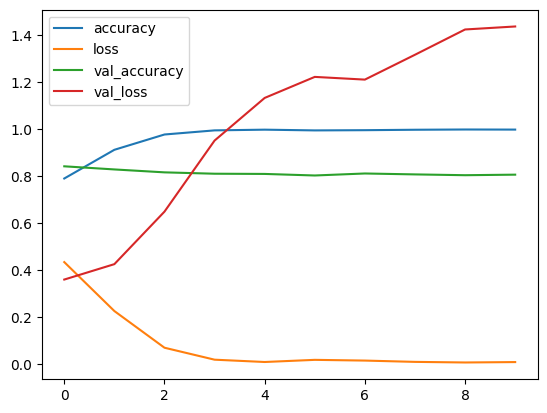

In [19]:
history = model.fit(padded,
                    train_labels,
                    epochs=10, validation_data=(test_padded, test_labels))

pd.DataFrame(history.history).plot()

Predicciones y probabilidades

In [20]:
test_pred_prob = model.predict(test_padded)
test_pred = (test_pred_prob > 0.5).astype("int32")  # Convertir probabilidades en predicciones binarias


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Matriz de confusión

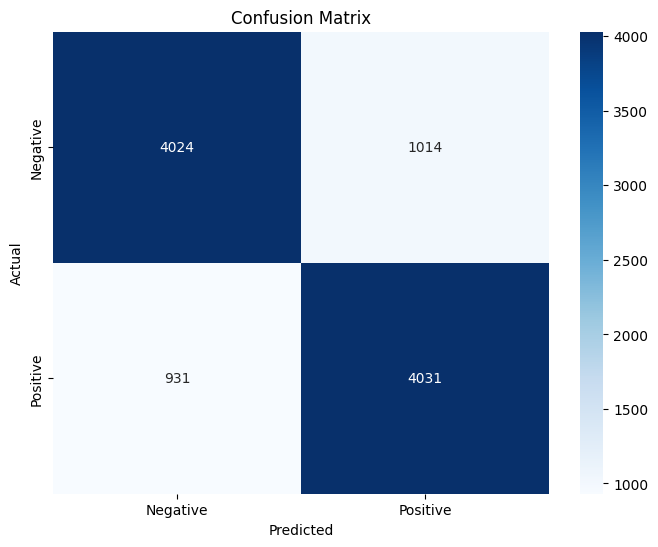

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(test_labels, test_pred)

# Dibujar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Reporte de clasificación

In [22]:
from sklearn.metrics import classification_report

# Generar y mostrar el reporte de clasificación
class_report = classification_report(test_labels, test_pred)
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      5038
           1       0.80      0.81      0.81      4962

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Curva ROC y AUC

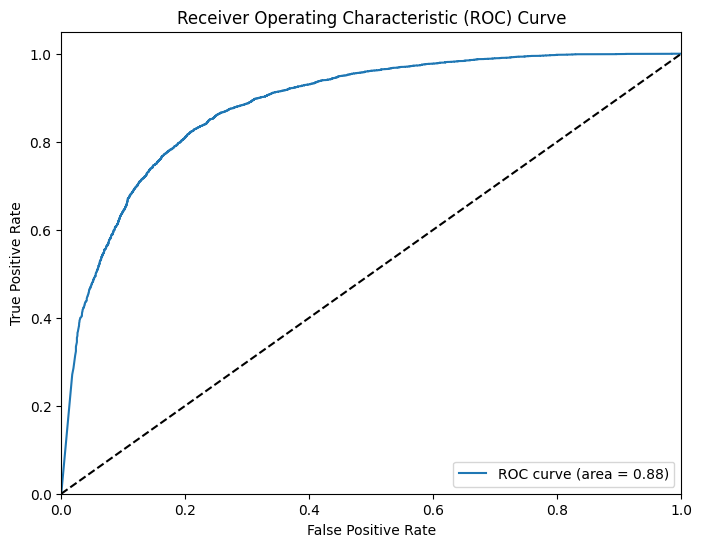

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener probabilidades para la clase positiva
y_prob = test_pred_prob

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(test_labels, y_prob)
roc_auc = roc_auc_score(test_labels, y_prob)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Histograma de diferencias

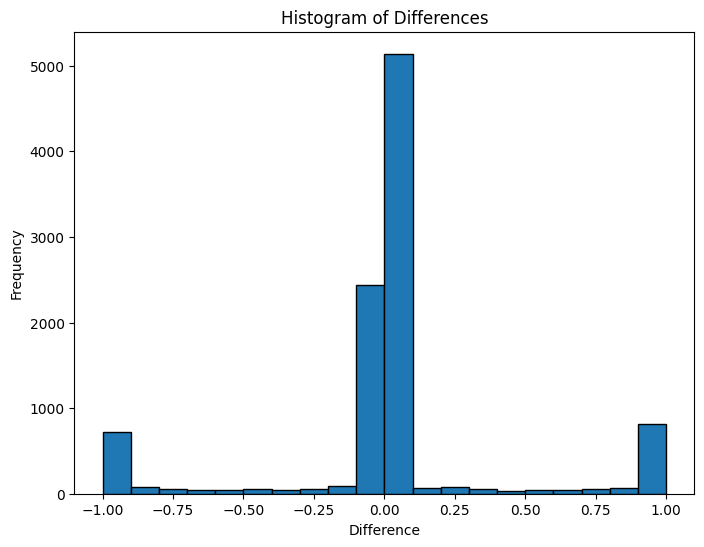

In [24]:
# Calcular las diferencias entre las probabilidades predichas y las etiquetas verdaderas
differences = y_prob.flatten() - test_labels

# Dibujar el histograma de diferencias
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=20, edgecolor='k')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Differences')
plt.show()